In [1]:
#%matplotlib inline
#*******************************************************************************
# Dependencies and Setup
#*******************************************************************************
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import json
#from config import api_key

#from pprint import pprint

#*******************************************************************************
# Load Data Files
#*******************************************************************************
movies_metadata_to_load = "Movie_Datasets/movies_metadata.csv"
ratings_to_load = "Movie_Datasets/ratings.csv"

print("testing")


testing


In [2]:

#*******************************************************************************
# Read the Movie Data from the file
#*******************************************************************************
movies_metadata_df = pd.read_csv(movies_metadata_to_load, low_memory=False)

print("testing")


testing


In [3]:

#*******************************************************************************
# Read the Rating Data from the file
#*******************************************************************************
ratings_df = pd.read_csv(ratings_to_load)

print("testing")


testing


In [4]:
#movies_metadata_df["id"].head()


In [5]:
movies_metadata_df.shape

(45466, 24)

In [6]:
#ratings_df["movieId"].head()


In [7]:

num_movies_metadata_df = (movies_metadata_df.drop("id", axis=1).join(movies_metadata_df["id"].apply(pd.to_numeric, errors='coerce')))
num_movies_metadata_df["id"] = pd.to_numeric(num_movies_metadata_df["id"])


In [8]:
num_movies_metadata_df.shape

(45466, 24)

In [9]:
num_movies_metadata_df["id"].head()


0      862.0
1     8844.0
2    15602.0
3    31357.0
4    11862.0
Name: id, dtype: float64

In [10]:
#movies_metadata_df.head(3)
#print out the columns in the movies_metadata_df dataframe
num_movies_metadata_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'id'],
      dtype='object')

In [11]:
#print first a few of the rows from the ratings_df dataframe
#ratings_df.head()

In [12]:
# Group the movie rating data by movie and average the ratings provided by the individual users.
ave_movie_rating = ratings_df.groupby(["movieId"]).mean()
ave_movie_rating.head()


,userId,rating,timestamp
movieId,,,
1,135121.043616,3.888157,1.113440e+09
2,134877.953761,3.236953,1.088621e+09
3,136520.452733,3.175550,9.661124e+08
4,136249.536062,2.875713,9.390243e+08
5,135293.275855,3.079565,9.896788e+08


In [13]:
print(f"There are {ave_movie_rating.shape[0]} movies included in this dataset.")


There are 45115 movies included in this dataset.


In [14]:
renamed_movies_metadata_df = num_movies_metadata_df.rename(columns={"id":"movieId"})
renamed_movies_metadata_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'movieId'],
      dtype='object')

In [15]:
#renamed_movies_metadata_df["movieId"].describe()


In [16]:
#ave_movie_rating.head()


In [17]:
merge_table = pd.merge(renamed_movies_metadata_df, ave_movie_rating, on="movieId")
merge_table.head(2)

,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,status,tagline,title,video,vote_average,vote_count,movieId,userId,rating,timestamp
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,Released,NaN,Toy Story,False,7.7,5415.0,862.0,133828.86631,3.598930,9.727758e+08
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,8844.0,138698.00813,3.760163,1.268060e+09


In [18]:
merge_table.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'movieId', 'userId', 'rating',
       'timestamp'],
      dtype='object')

In [19]:
trimmed_merge_table = merge_table[["budget", "genres", "imdb_id", "production_countries", "release_date", "runtime", 
                                   "revenue", "title", "vote_average", "vote_count", "movieId", "rating", "popularity"]]

In [20]:
trimmed_merge_table.count()

budget                  7569
genres                  7569
imdb_id                 7567
production_countries    7569
release_date            7561
runtime                 7550
revenue                 7569
title                   7569
vote_average            7569
vote_count              7569
movieId                 7569
rating                  7569
popularity              7569
dtype: int64

In [21]:
clean_trimmed_merge_table = trimmed_merge_table.dropna(how='any')

In [22]:
clean_trimmed_merge_table.count()

budget                  7542
genres                  7542
imdb_id                 7542
production_countries    7542
release_date            7542
runtime                 7542
revenue                 7542
title                   7542
vote_average            7542
vote_count              7542
movieId                 7542
rating                  7542
popularity              7542
dtype: int64

In [23]:
clean_trimmed_merge_table.head()

,budget,genres,imdb_id,production_countries,release_date,runtime,revenue,title,vote_average,vote_count,movieId,rating,popularity
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",tt0114709,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,373554033.0,Toy Story,7.7,5415.0,862.0,3.598930,21.946943
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",tt0113497,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,104.0,262797249.0,Jumanji,6.9,2413.0,8844.0,3.760163,17.015539
2,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",tt0113277,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,170.0,187436818.0,Heat,7.7,1886.0,949.0,3.905544,17.924927
3,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",tt0113189,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,130.0,352194034.0,GoldenEye,6.6,1194.0,710.0,2.740334,14.686036
4,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",tt0112760,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1995-12-22,119.0,10017322.0,Cutthroat Island,5.7,137.0,1408.0,3.710181,7.284477


In [24]:
total_num_movies = clean_trimmed_merge_table.shape[0]
print(f"There are {total_num_movies} movies included in this reduced dataset.")

There are 7542 movies included in this reduced dataset.


In [25]:
#rating_success = 0

#successful_movies_df = clean_trimmed_merge_table.loc[trimmed_merge_table["rating"] >= rating_success, :]
#print(f"There are {successful_movies_df.shape[0]} successful movies with average ratings greater than {rating_success}")
#percentage_successful_movies = (successful_movies_df.shape[0]/total_num_movies) * 100
#formatted_successful_movies = percentage_successful_movies.map("{:.2f}%".format)
#formatted_successful_movies = str(percentage_successful_movies)
#formatted_successful_movies = "{:.2f}%".format(float(percentage_successful_movies))

#print(f"The percentage of successful movies is {formatted_successful_movies}")
#print(percentage_successful_movies)

In [26]:
#formatted_successful_movies = "{:.2f}%".format(float(percentage_successful_movies))
#print(formatted_successful_movies)

## Create runtime distribution pie graph

In [27]:
trimmed_runtime_movies_df = clean_trimmed_merge_table.loc[clean_trimmed_merge_table["runtime"] < 900, :]
trimmed_runtime_movies_df.shape


(7542, 13)

In [28]:
# Create the bins in which Data will be held
bins = [0, 60, 120, 180, 900]

# Create the names for the four bins
group_names = ["< 1 Hrs", "1-2 Hrs", "2-3 Hrs", "> 3 Hrs" ]


In [29]:
trimmed_runtime_movies_df["Runtime Breakdown"] = pd.cut(trimmed_runtime_movies_df["runtime"], bins, labels=group_names)
trimmed_runtime_movies_df.head(1)

,budget,genres,imdb_id,production_countries,release_date,runtime,revenue,title,vote_average,vote_count,movieId,rating,popularity,Runtime Breakdown
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",tt0114709,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,373554033.0,Toy Story,7.7,5415.0,862.0,3.59893,21.946943,1-2 Hrs


In [30]:
runtime_count_df = trimmed_runtime_movies_df[["rating", "runtime", "Runtime Breakdown"]]
runtime_count_df = runtime_count_df.groupby("Runtime Breakdown")
runtime_count_df.count()["runtime"]

Runtime Breakdown
< 1 Hrs     362
1-2 Hrs    5875
2-3 Hrs    1029
> 3 Hrs     109
Name: runtime, dtype: int64

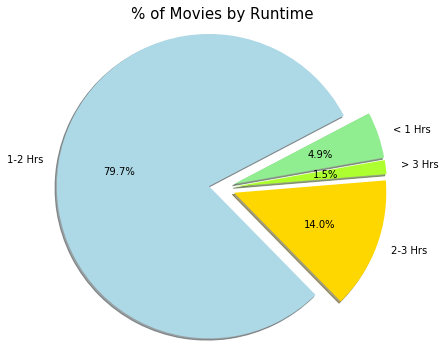

In [31]:
#*******************************************************************************
# Define appearance for the pie chart
#*******************************************************************************
#        [Xshort, short,         med,          long,  Xlong,    XXlong]
#colors = ["gold","lightskyblue", "lightcoral", "blue","orange", "red"]
colors = ["lightgreen","lightblue", "gold", "greenyellow"]
explode = (0.15,0.15,0.15,0.15)

#*******************************************************************************
# Define the title for the pie chart
#*******************************************************************************
plt.title("% of Movies by Runtime", y=1.25, fontsize=15)

#*******************************************************************************
# Define pie chart
#*******************************************************************************
plt.pie(runtime_count_df.count()["runtime"], explode=explode, 
        labels=group_names, colors=colors, autopct="%1.1f%%", shadow=True, 
        startangle=10, radius=1.75)

#*******************************************************************************
# Show Figures
#*******************************************************************************
#plt.tight_layout()
plt.show()

## Create Bar chart of average rating / runtime

In [32]:
ratings_runtime_ave_df = trimmed_runtime_movies_df[["rating", "runtime", "Runtime Breakdown"]]
ratings_runtime_ave_df = ratings_runtime_ave_df.groupby("Runtime Breakdown").mean()
#ratings_runtime_ave_df.mean()
#ratings_runtime_ave_df["rating"].head()

In [33]:
# Filter the DataFrame down only to those columns to chart
runtime_and_ave_df = ratings_runtime_ave_df[["rating"]]

# Set the index to be "State" so they will be used as labels
#state_and_inches = state_and_inches.set_index("State")

runtime_and_ave_df.head()

,rating
Runtime Breakdown,
< 1 Hrs,3.100157
1-2 Hrs,3.125094
2-3 Hrs,3.150833
> 3 Hrs,3.184412


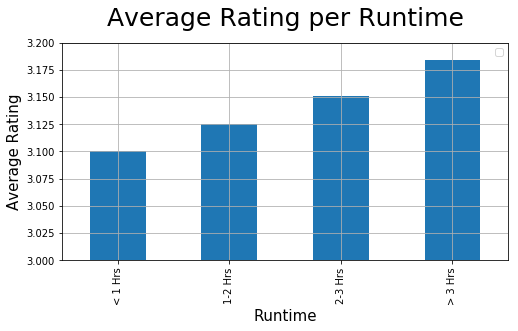

In [34]:
# Use DataFrame.plot() in order to create a bar chart of the data
runtime_and_ave_df.plot(kind="bar", figsize=(8,4))

# Set a title for the chart
plt.title("Average Rating per Runtime", y=1.05, fontsize=25)
plt.xlabel("Runtime", y=1.05, fontsize=15)
plt.ylabel("Average Rating", fontsize=15)
plt.legend("")


#runtime_and_ave_df.set_xlim([xmin,xmax])
plt.ylim([3,3.2])

#*******************************************************************************
#Add the grid to the chart
#*******************************************************************************
plt.grid()

#plt.tight_layout()
plt.show()


## Define data for profit (revenue - budget) vs ratings

## Create profit distribution pie graph

In [109]:
clean_trimmed_merge_table.head(2)


,budget,genres,imdb_id,production_countries,release_date,runtime,revenue,title,vote_average,vote_count,movieId,rating,popularity,Profit
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",tt0114709,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,373554033.0,Toy Story,7.7,5415.0,862.0,3.598930,21.946943,343.554033
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",tt0113497,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,104.0,262797249.0,Jumanji,6.9,2413.0,8844.0,3.760163,17.015539,197.797249


In [110]:
#non_zero_budget_movies_df = clean_trimmed_merge_table.loc[clean_trimmed_merge_table["budget"] > 0, :]
#non-zero_budget_movies_df.shape

#financial_df = clean_trimmed_merge_table.loc[clean_trimmed_merge_table["budget"] > 0, :]
#financial_df.shape

clean_budget_df = clean_trimmed_merge_table.loc[clean_trimmed_merge_table["budget"] > 0]
clean_budget_df.shape


(2124, 14)

In [111]:
clean_budget_df.head(2)

,budget,genres,imdb_id,production_countries,release_date,runtime,revenue,title,vote_average,vote_count,movieId,rating,popularity,Profit
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",tt0114709,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,373554033.0,Toy Story,7.7,5415.0,862.0,3.598930,21.946943,343.554033
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",tt0113497,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,104.0,262797249.0,Jumanji,6.9,2413.0,8844.0,3.760163,17.015539,197.797249


In [112]:
#non_zero_budget_movies_df = clean_trimmed_merge_table.loc[clean_trimmed_merge_table["budget"] > 0, :]
#non-zero_budget_movies_df.shape

#financial_df = clean_trimmed_merge_table.loc[clean_trimmed_merge_table["budget"] > 0, :]
#financial_df.shape

clean_revenue_df = clean_budget_df.loc[clean_budget_df["revenue"] > 0]
clean_revenue_df.shape


(1575, 14)

In [113]:
clean_revenue_df.head(2)

,budget,genres,imdb_id,production_countries,release_date,runtime,revenue,title,vote_average,vote_count,movieId,rating,popularity,Profit
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",tt0114709,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,373554033.0,Toy Story,7.7,5415.0,862.0,3.598930,21.946943,343.554033
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",tt0113497,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,104.0,262797249.0,Jumanji,6.9,2413.0,8844.0,3.760163,17.015539,197.797249


In [114]:
#non_zero_budget_movies_df.columns

In [115]:
#non_zero_financial_movies_df = non_zero_budget_movies_df.loc[non_zero_budget_movies_df["revenue"] > 0, :]
#non_zero_financial_movies_df.shape

financial_df = clean_revenue_df.loc[clean_revenue_df["revenue"] > 0, :]
financial_df = financial_df[["rating", "budget", "revenue", "Profit"]]
financial_df.shape


(1575, 4)

In [116]:
financial_df.head(2)

,rating,budget,revenue,Profit
0,3.598930,30000000,373554033.0,343.554033
1,3.760163,65000000,262797249.0,197.797249


In [117]:
#non_zero_financial_movies_df["revenue"].describe()

financial_df["revenue"].describe()

count    1.575000e+03
mean     1.244354e+08
std      1.814967e+08
min      4.000000e+00
25%      1.431847e+07
50%      5.709619e+07
75%      1.563362e+08
max      1.845034e+09
Name: revenue, dtype: float64

In [128]:
# non_zero_financial_movies_df["revenue"] = pd.to_numeric(non_zero_financial_movies_df["revenue"])
# non_zero_financial_movies_df["budget"] = pd.to_numeric(non_zero_financial_movies_df["budget"])

# non_zero_financial_movies_df["Profit"] = (non_zero_financial_movies_df["revenue"] - non_zero_financial_movies_df["budget"])/1000000
# #clean_trimmed_merge_table["Profit"] = clean_trimmed_merge_table["Profit"].map("${:.0f}".format)
# non_zero_financial_movies_df.head()

financial_df["revenue"] = pd.to_numeric(financial_df["revenue"])
financial_df["budget"] = pd.to_numeric(financial_df["budget"])

financial_df["Profit"] = (financial_df["revenue"] - financial_df["budget"])/1000000
financial_df.head(2)


,rating,budget,revenue,Profit,Profit Range (millions)
0,3.598930,30000000,373554033.0,343.554033,$0-$350
1,3.760163,65000000,262797249.0,197.797249,$0-$350


In [129]:
#minProfit = non_zero_financial_movies_df["Profit"].min()
#maxProfit = non_zero_financial_movies_df["Profit"].max()

minProfit = financial_df["Profit"].min()
maxProfit = financial_df["Profit"].max()
print(f"min profit is {minProfit}")
print(f"min profit is {maxProfit}")


min profit is -98.301101
min profit is 1645.034188


In [130]:
# Create the bins in which Data will be held
fin_bins = [-100, 0, 350, 700, 1646]

# Create the names for the four bins
fin_group_names = ["< $0", "$0-$350", "$350-$700", "> $700" ]


In [131]:
financial_df["Profit Range (millions)"] = pd.cut(financial_df["Profit"], fin_bins, labels=fin_group_names)
financial_df.head()

,rating,budget,revenue,Profit,Profit Range (millions)
0,3.598930,30000000,373554033.0,343.554033,$0-$350
1,3.760163,65000000,262797249.0,197.797249,$0-$350
2,3.905544,60000000,187436818.0,127.436818,$0-$350
3,2.740334,58000000,352194034.0,294.194034,$0-$350
4,3.710181,98000000,10017322.0,-87.982678,< $0


In [132]:
financial_count_df = financial_df[["rating", "Profit", "Profit Range (millions)"]]
financial_count_df = financial_count_df.groupby("Profit Range (millions)")
financial_count_df.count()["Profit"]

Profit Range (millions)
< $0          323
$0-$350      1155
$350-$700      76
> $700         21
Name: Profit, dtype: int64

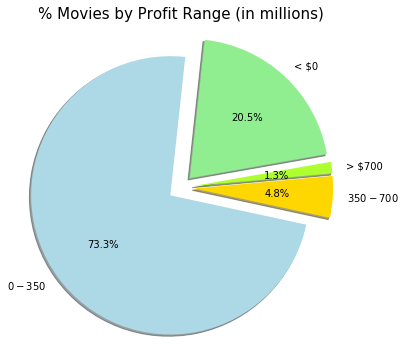

In [142]:
#*******************************************************************************
# Define appearance for the pie chart
#*******************************************************************************
#        [Xshort, short,         med,          long,  Xlong,    XXlong]
#colors = ["gold","lightskyblue", "lightcoral", "blue","orange", "red"]
colors = ["lightgreen","lightblue", "gold", "greenyellow"]
explode = (0.15,0.15,0.15,0.15)

#*******************************************************************************
# Define the title for the pie chart
#*******************************************************************************
plt.title("% Movies by Profit Range (in millions)", y=1.25, fontsize=15)

#*******************************************************************************
# Define pie chart
#*******************************************************************************
plt.pie(financial_count_df.count()["Profit"], explode=explode, 
        labels=fin_group_names, colors=colors, autopct="%1.1f%%", shadow=True, 
        startangle=10, radius=1.6)

#*******************************************************************************
# Show Figures
#*******************************************************************************
#plt.tight_layout()
plt.show()

## Create Bar chart of average rating / runtime

In [136]:
financial_ave_df = financial_df[["rating", "Profit", "Profit Range (millions)"]]
financial_ave_df = financial_ave_df.groupby("Profit Range (millions)").mean()
#ratings_runtime_ave_df.mean()
#ratings_runtime_ave_df["rating"].head()

In [137]:
# Filter the DataFrame down only to those columns to chart
financial_ave_df = financial_ave_df[["rating"]]

# Set the index to be "State" so they will be used as labels
#state_and_inches = state_and_inches.set_index("State")

financial_ave_df.head()

,rating
Profit Range (millions),
< $0,3.129890
$0-$350,3.212715
$350-$700,3.070161
> $700,3.231788


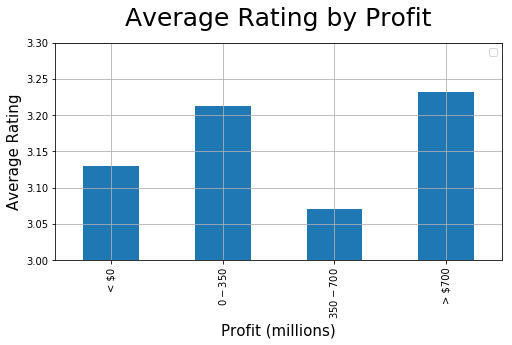

In [141]:
# Use DataFrame.plot() in order to create a bar chart of the data
financial_ave_df.plot(kind="bar", figsize=(8,4))

# Set a title for the chart
plt.title("Average Rating by Profit", y=1.05, fontsize=25)
plt.xlabel("Profit (millions)", y=1.05, fontsize=15)
plt.ylabel("Average Rating", fontsize=15)
plt.legend("")


#runtime_and_ave_df.set_xlim([xmin,xmax])
plt.ylim([3,3.3])

#*******************************************************************************
#Add the grid to the chart
#*******************************************************************************
plt.grid()

#plt.tight_layout()
plt.show()
